# Capstone Project 2- Group 6

## Importing required libraries

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

### EDA and Univariate Analysis

In [11]:
# Loading dataset
df_gender = pd.read_excel('gender_data.xlsx')
df_age = pd.read_excel('age_data.xlsx')
df_occ = pd.read_excel('occ_data.xlsx')
df_pr = pd.read_excel('PR By Country.xlsx')

#### Gender

In [12]:
# checking basic information on columns and dtype
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PROVINCE  333 non-null    object
 1   Gender    324 non-null    object
 2   Year      333 non-null    int64 
 3   Total     333 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.5+ KB


In [14]:
print(df_gender['Total'].value_counts())

0       44
--      37
5        9
20       8
10       6
        ..
2890     1
3095     1
2255     1
2350     1
345      1
Name: Total, Length: 207, dtype: int64


cleaning missing and invalid values

In [15]:
#changing '--' to zero and dtype of column
df_gender['Total'] = df_gender['Total'].replace('--', 0).astype(int)
df_gender['Year'] = df_gender['Year'].astype('category')
#cleaning 9 mising values
df_gender = df_gender.dropna()

In [16]:
#filtering gender column for better visualisation
df_gender = df_gender[df_gender['Gender'].isin(['Male', 'Female'])]

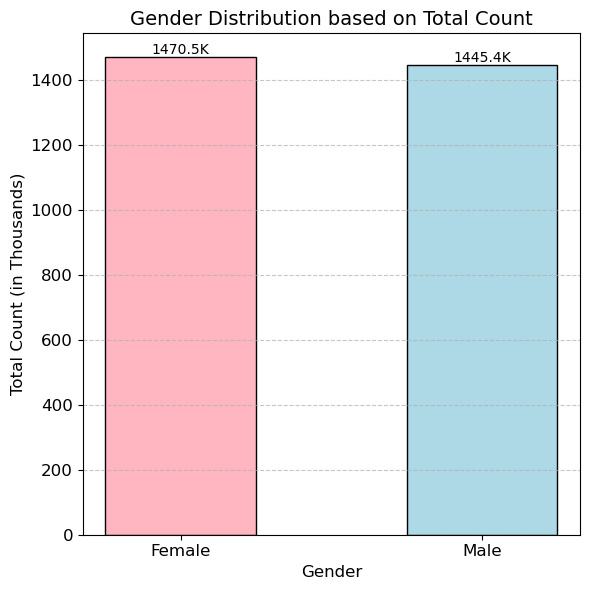

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Assigning a matplotlib style
sns.color_palette("viridis")

# Grouping by gender and summing the totals
gender_distribution = df_gender.groupby('Gender')['Total'].sum()

# Create a bar chart with reduced width and colors assigned
plt.figure(figsize=(6, 6))  # Reducing the figure size
colors = ['#FFB6C1','#ADD8E6']   # Assigning blue to male and pink to female

# Creating the bar chart with customized colors, edge color, and reduced width
bars = plt.bar(np.arange(len(gender_distribution)), gender_distribution.values / 1000, color=colors, edgecolor='black', linewidth=1, width=0.5)  
# Reduced width to make bars thinner

# Adding data labels on top of each bar with values in thousands
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{gender_distribution.values[i] / 1000:.1f}K', ha='center', va='bottom', fontsize=10)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Gender', fontsize=12)  # Increasing font size for x-label
plt.ylabel('Total Count (in Thousands)', fontsize=12)  # Increasing font size for y-label
plt.title('Gender Distribution based on Total Count', fontsize=14)  # Increasing font size for title

plt.xticks(np.arange(len(gender_distribution)), gender_distribution.index, fontsize=12)  # Setting x-ticks to be the gender labels
plt.yticks(fontsize=12)  # Increasing font size for y-ticks

plt.tight_layout()  # Adjusting layout to prevent clipping of labels

plt.show()


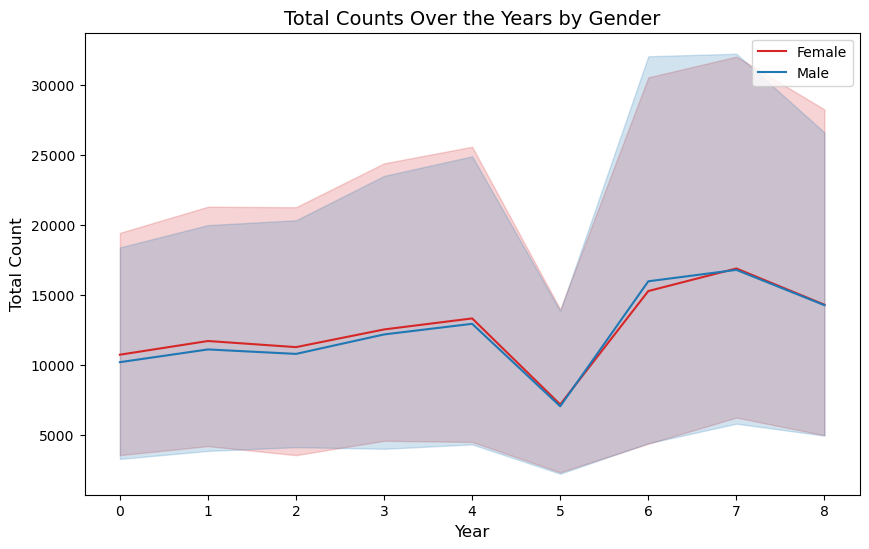

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("viridis")

# Assigning pastel colors for blue and pink
colors = ['#d62728', '#1f77b4']  # Red for male and blue for female

# Creating the line plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total', hue='Gender', data=df_gender, palette=colors)

plt.title('Total Counts Over the Years by Gender', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

plt.show()


In [28]:
# Create a pivot table to aggregate Total counts for each gender and province
pivot_table = df_gender.pivot_table(index='PROVINCE', columns='Gender', values='Total', aggfunc='sum', fill_value=0)

# Calculate total counts for each province
pivot_table['Total'] = pivot_table.sum(axis=1)

# Calculate percentage distribution for each gender
for gender in pivot_table.columns[:-1]:  # Exclude the 'Total' column
    pivot_table[f'{gender}_Percentage'] = pivot_table[gender] / pivot_table['Total'] * 100

# Displaying the pivot table with only percentage distribution
percentage_table = pivot_table.drop(columns=['Male', 'Female', 'Total'])
print(percentage_table)


Gender                     Female_Percentage  Male_Percentage
PROVINCE                                                     
Alberta                            51.473977        48.526023
British Columbia                   51.489372        48.510628
Manitoba                           48.995411        51.004589
New Brunswick                      48.502125        51.497875
Newfoundland and Labrador          48.330956        51.669044
Northwest Territories              50.246305        49.753695
Nova Scotia                        47.511202        52.488798
Nunavut                            57.812500        42.187500
Ontario                            50.367508        49.632492
Prince Edward Island               45.564822        54.435178
Quebec                             50.433102        49.566898
Saskatchewan                       49.324147        50.675853
Yukon                              49.475262        50.524738


#### Age group

In [43]:
df_age.head()

,AGE GROUP,Province,Year,Total
0,0 to 14 years old,Newfoundland and Labrador,2015,295
1,15 to 29 years old,Newfoundland and Labrador,2015,270
2,30 to 44 years old,Newfoundland and Labrador,2015,445
3,45 to 59 years old,Newfoundland and Labrador,2015,90
4,60 to 74 years old,Newfoundland and Labrador,2015,15


In [44]:
df_age['Year'] = df_age['Year'].astype('category')

In [31]:
df_age.describe()

,Total
count,674.000000
mean,4203.123145
std,9241.880710
min,0.000000
25%,50.000000
50%,602.500000
75%,3965.000000
max,90245.000000


In [45]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AGE GROUP  674 non-null    object  
 1   Province   674 non-null    object  
 2   Year       674 non-null    category
 3   Total      674 non-null    int64   
dtypes: category(1), int64(1), object(2)
memory usage: 16.9+ KB


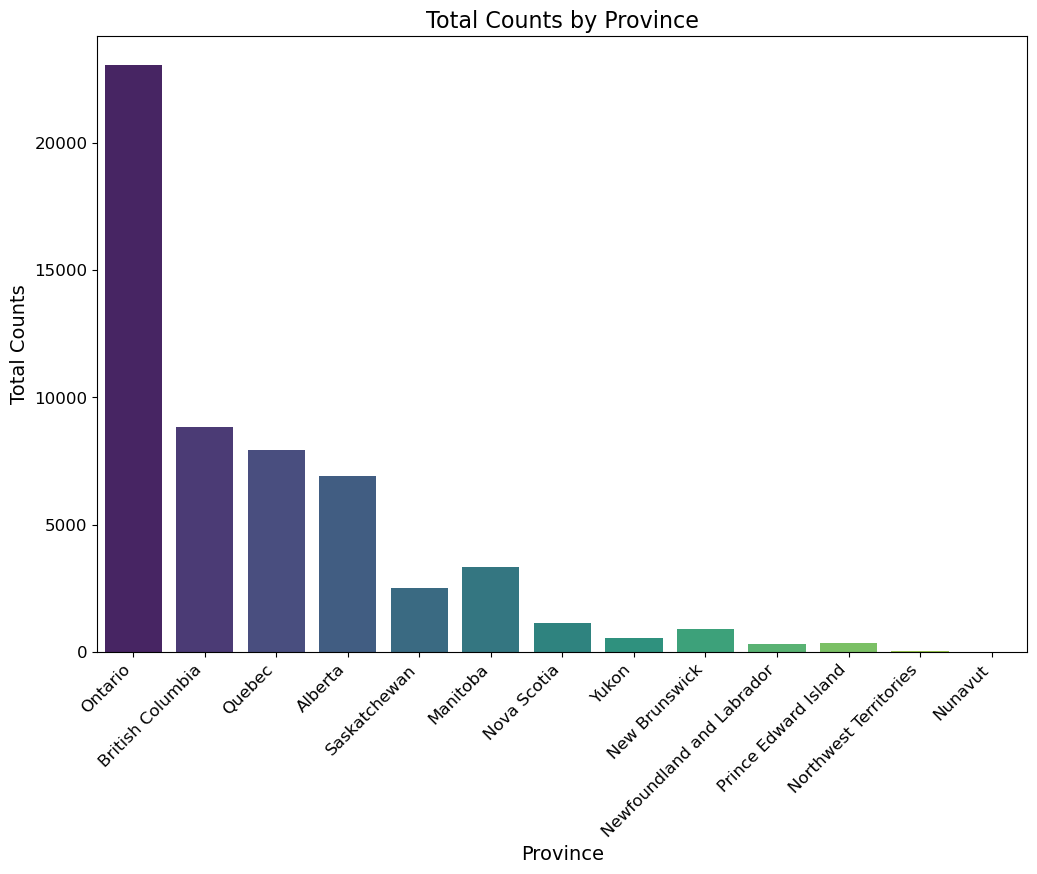

In [65]:
# Sort the DataFrame by 'Total' column in descending order
df_age_sorted = df_age.sort_values(by='Total', ascending=False)

# Set a custom color palette
colors = sns.color_palette("viridis", len(df_age_sorted['Province'].unique()))

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Province', y='Total', data=df_age_sorted, palette=colors, ci=None)

# Add title and labels
plt.title('Total Counts by Province', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Total Counts', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set y-axis label font size
plt.yticks(fontsize=12)

# Show plot
plt.show()


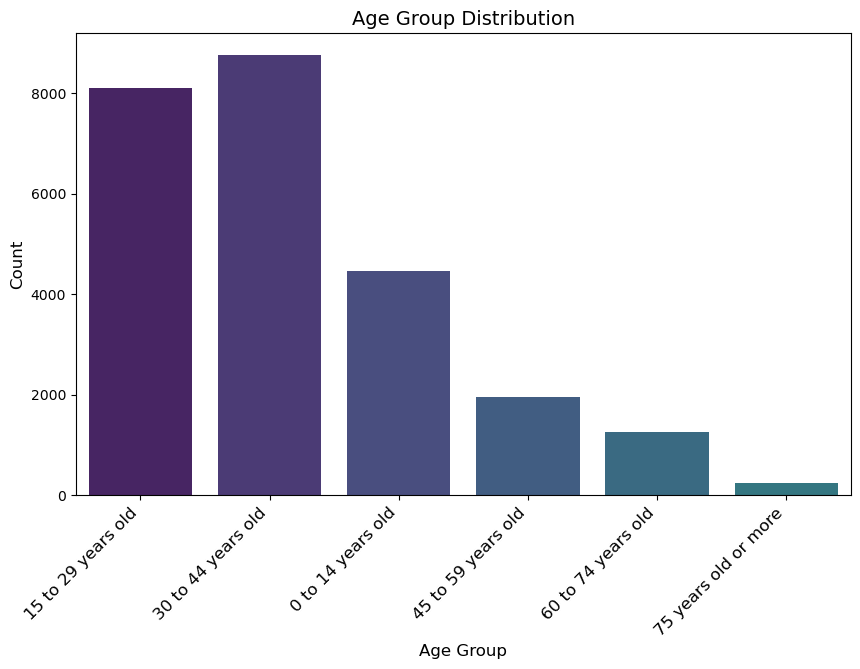

In [69]:
sns.set_palette("husl")
# Sort the DataFrame by 'Total' column in descending order
df_age_sorted = df_age.sort_values(by='Total', ascending=False)

# Set a custom color palette
colors = sns.color_palette("viridis", len(df_age_sorted['Province'].unique()))

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AGE GROUP', y='Total', data=df_age_sorted, palette=colors, ci=None)

# Add title and labels
plt.title('Age Group Distribution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set y-axis label font size
plt.yticks(fontsize=10)

# Show plot
plt.show()


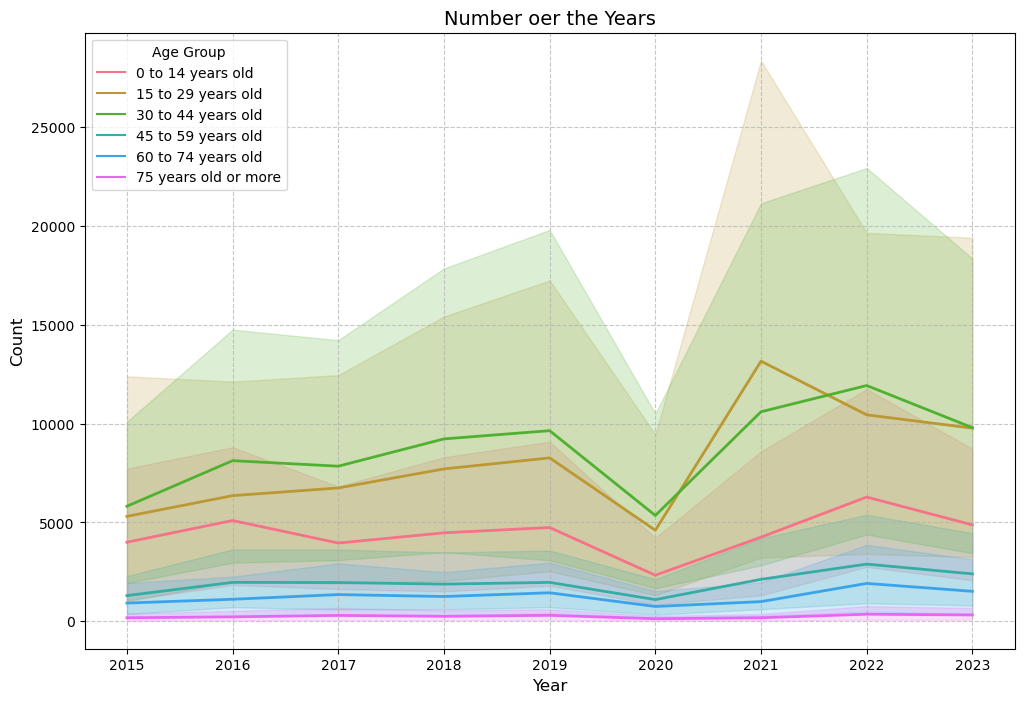

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
sns.set_palette("husl")

# Plotting the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Total', hue='AGE GROUP', data=df_age, linewidth=2)

# Title and labels
plt.title('Number over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Increase font size for ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Customize the legend
plt.legend(title='Age Group', title_fontsize='10', fontsize='10', loc='upper left')

plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for better readability

plt.show()


In [72]:
# Province-wise Analysis
province_summary = df_age.groupby('Province').describe()
province_summary

Total                                              \
                          count          mean           std    min      25%   
Province                                                                      
Alberta                    53.0   6920.943396   5901.498185   20.0  1880.00   
British Columbia           44.0   8845.227273   7818.428064  190.0  3558.75   
Manitoba                   44.0   3320.113636   2364.737679  280.0  1017.50   
New Brunswick              53.0    897.169811    953.716168    0.0    60.00   
Newfoundland and Labrador  54.0    324.259259    378.161400    0.0    30.00   
Northwest Territories      54.0     37.222222     40.836382    0.0     5.00   
Nova Scotia                54.0   1136.851852   1232.500257   10.0   112.50   
Nunavut                    54.0      6.388889      6.020144    0.0     0.00   
Ontario                    52.0  23044.230769  21630.894989  830.0  6672.50   
Prince Edward Island       54.0    366.111111    378.585583    0.0    20.00   
Quebec                     53.0   7947.924528   6913.310353  145.0  1810.00   
Saskatchewan               53.0   2524.150943   2273.858280   50.0   345.00   
Yukon                      52.0    556.250000    911.982260   10.0    43.75   

                                                       
                               50%       75%      max  
Province                                               
Alberta                     3970.0  13735.00  19055.0  
British Columbia            6007.5  13621.25  31810.0  
Manitoba                    3657.5   5218.75   8175.0  
New Brunswick                600.0   1500.00   3680.0  
Newfoundland and Labrador    230.0    441.25   1655.0  
Northwest Territories         25.0     55.00    165.0  
Nova Scotia                  752.5   1751.25   4630.0  
Nunavut                        5.0     10.00     20.0  
Ontario                    13675.0  33133.75  90245.0  
Prince Edward Island         310.0    597.50   1530.0  
Quebec                      5265.0  12945.00  26060.0  
Saskatchewan                1870.0   3950.00   8295.0  
Yukon                        140.0    508.75   3700.0

#### Profession Category

In [73]:
df_occ.head()

,Province,Occupation,Year,Total
0,Newfoundland and Labrador,0012 - Senior government managers and officials,2015,0
1,Newfoundland and Labrador,"0013 - Senior managers - financial, communicat...",2015,0
2,Newfoundland and Labrador,"0014 - Senior managers - health, education, so...",2015,0
3,Newfoundland and Labrador,"0016 - Senior managers - construction, transpo...",2015,0
4,Newfoundland and Labrador,0111 - Financial managers,2015,0


In [74]:
df_occ['Year'] = df_occ['Year'].astype('category')
df_occ = df_occ[df_occ['Occupation'] != 'Other occupations']

In [75]:
df_occ.describe()

,Total
count,40878.000000
mean,137.109325
std,4548.720951
min,0.000000
25%,0.000000
50%,0.000000
75%,10.000000
max,355865.000000


In [76]:
df_occ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40878 entries, 0 to 40994
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Province    40878 non-null  object  
 1   Occupation  40743 non-null  object  
 2   Year        40878 non-null  category
 3   Total       40878 non-null  int64   
dtypes: category(1), int64(1), object(2)
memory usage: 1.3+ MB


cleaning missing and invalid values

In [77]:
# Check for missing values with another method
print(df_occ.isnull().sum())

Province        0
Occupation    135
Year            0
Total           0
dtype: int64


In [78]:
df_occ = df_occ.dropna()

In [79]:
df_occ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40743 entries, 0 to 40990
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Province    40743 non-null  object  
 1   Occupation  40743 non-null  object  
 2   Year        40743 non-null  category
 3   Total       40743 non-null  int64   
dtypes: category(1), int64(1), object(2)
memory usage: 1.3+ MB


In [80]:
df_occ.head()

,Province,Occupation,Year,Total
0,Newfoundland and Labrador,0012 - Senior government managers and officials,2015,0
1,Newfoundland and Labrador,"0013 - Senior managers - financial, communicat...",2015,0
2,Newfoundland and Labrador,"0014 - Senior managers - health, education, so...",2015,0
3,Newfoundland and Labrador,"0016 - Senior managers - construction, transpo...",2015,0
4,Newfoundland and Labrador,0111 - Financial managers,2015,0


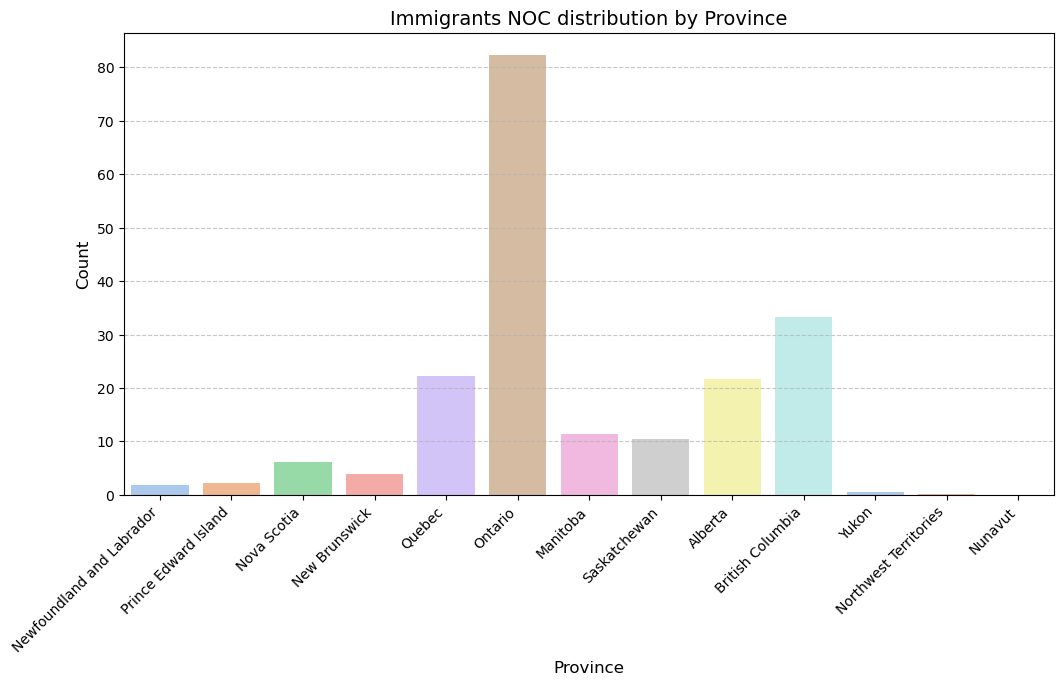

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
colors = sns.color_palette("pastel")

# Create the bar plot with enhanced aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='Total', data=df_occ, palette=colors, ci=None)

# Add title and labels with increased font sizes
plt.title('Immigrants NOC distribution by Province', fontsize=14)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Set y-axis label font size
plt.yticks(fontsize=10)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


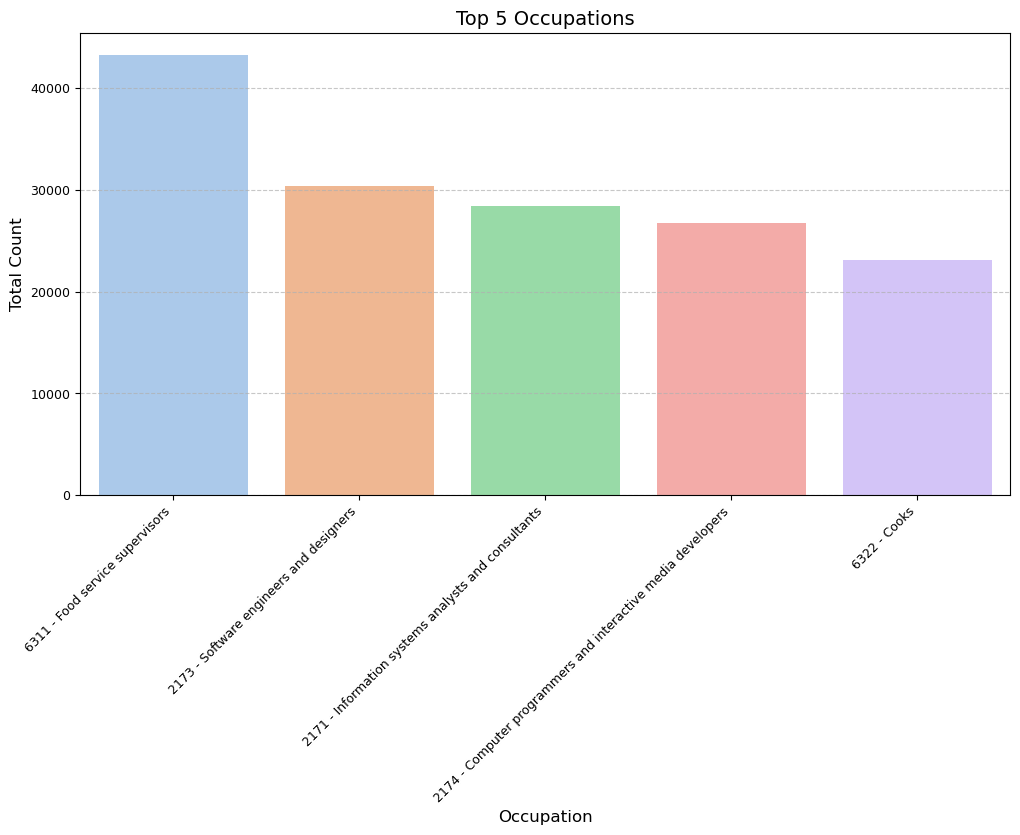

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total counts for each occupation
occupation_counts = df_occ.groupby('Occupation')['Total'].sum().sort_values(ascending=False)

# Get the top 5 occupations
top_5_occupations = occupation_counts.head(5)

# Set a custom color palette
colors = sns.color_palette("pastel")

# Create the bar plot with enhanced aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_occupations.index, y=top_5_occupations.values, palette=colors, ci=None)

# Add title and labels with increased font sizes
plt.title('Top 5 Occupations', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Total Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=9)

# Set y-axis label font size
plt.yticks(fontsize=9)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [89]:
import pandas as pd

# Filter out occupations with non-zero and non-null values
non_zero_occupations = occupation_counts[occupation_counts != 0].dropna()

# Get the bottom 5 non-zero occupations
bottom_5_occupations = non_zero_occupations.tail(5)

# Convert bottom 5 occupations to a DataFrame
bottom_5_df = pd.DataFrame(bottom_5_occupations, columns=['Total'])

# Print the DataFrame
print("Bottom 5 Occupations by Total Counts (Non-zero and Non-null):\n")
bottom_5_df


Bottom 5 Occupations by Total Counts (Non-zero and Non-null):



,Total
Occupation,
9611 - Labourers in mineral and metal processing,5
"9223 - Supervisors, electrical products manufacturing",5
"9414 - Concrete, clay and stone forming operators",5
7522 - Public works maintenance equipment operators and related workers,5
9616 - Labourers in textile processing,5


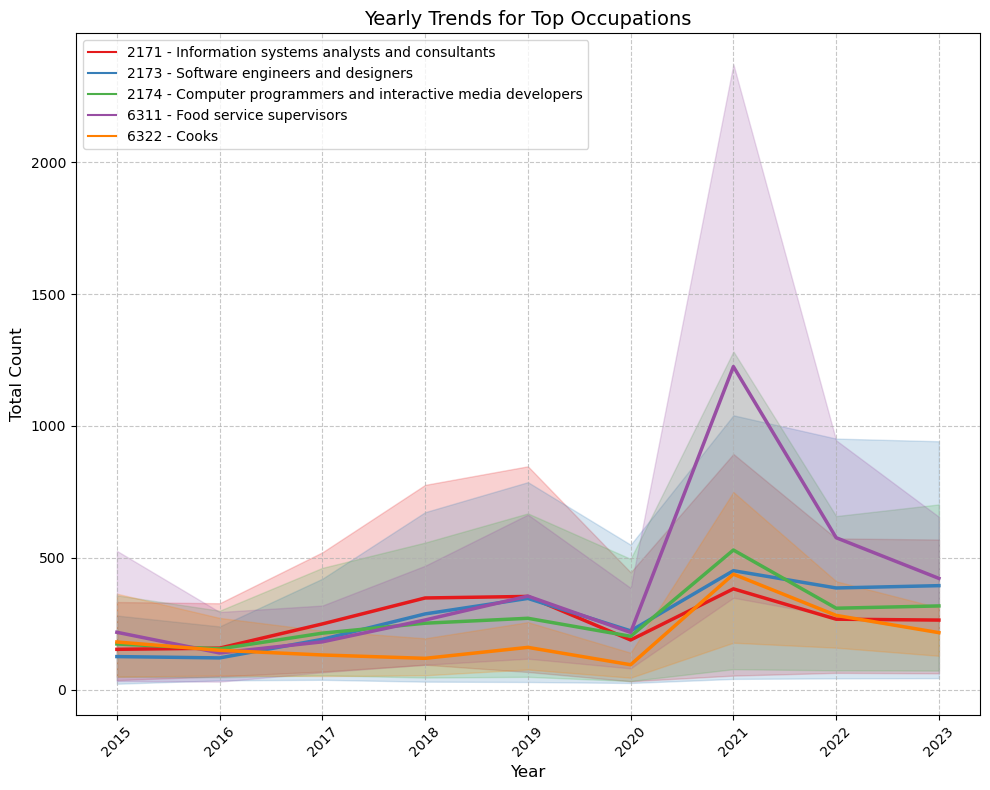

In [95]:
top_occupations = occupation_counts.head(5).index
df_top_occupations = df_occ[df_occ['Occupation'].isin(top_occupations)]

plt.figure(figsize=(10, 8))

# Set a custom color palette
colors = sns.color_palette("Set1", len(top_occupations))

# Plotting the line plot with enhanced aesthetics
sns.lineplot(x='Year', y='Total', hue='Occupation', data=df_top_occupations, palette=colors, linewidth=2.5)

# Add title and labels with increased font sizes
plt.title('Yearly Trends for Top Occupations', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Count', fontsize=12)

# Increase font size for legend
plt.legend(fontsize=10, bbox_to_anchor=(0, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Set y-axis label font size
plt.yticks(fontsize=10)

# Show gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Tighten the layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


In [96]:
# Province-wise Analysis
province_summary = df_occ.groupby('Province').describe()

province_summary

Total                                         \
                            count       mean         std  min  25%   50%   
Province                                                                   
Alberta                    4167.0  21.677466   81.396056  0.0  0.0   0.0   
British Columbia           4167.0  33.305736  112.327949  0.0  0.0   5.0   
Manitoba                   4176.0  11.437979   38.550193  0.0  0.0   0.0   
New Brunswick              3402.0   3.883010   17.717485  0.0  0.0   0.0   
Newfoundland and Labrador  2538.0   1.790780   12.165686  0.0  0.0   0.0   
Northwest Territories      1359.0   0.224430    1.948631  0.0  0.0   0.0   
Nova Scotia                3555.0   6.205345   30.861573  0.0  0.0   0.0   
Nunavut                     378.0   0.000000    0.000000  0.0  0.0   0.0   
Ontario                    4329.0  82.346962  270.260475  0.0  0.0  10.0   
Prince Edward Island       2763.0   2.271082   11.918957  0.0  0.0   0.0   
Quebec                     4419.0  22.176963   87.309526  0.0  0.0   0.0   
Saskatchewan               3762.0  10.437267   45.086863  0.0  0.0   0.0   
Yukon                      1728.0   0.619213    4.337221  0.0  0.0   0.0   

                                         
                            75%     max  
Province                                 
Alberta                    15.0  1870.0  
British Columbia           25.0  3085.0  
Manitoba                   10.0   670.0  
New Brunswick               0.0   350.0  
Newfoundland and Labrador   0.0   270.0  
Northwest Territories       0.0    35.0  
Nova Scotia                 0.0   830.0  
Nunavut                     0.0     0.0  
Ontario                    50.0  6985.0  
Prince Edward Island        0.0   240.0  
Quebec                     15.0  2230.0  
Saskatchewan                5.0  1045.0  
Yukon                       0.0    85.0

#### Country of origin

In [97]:
df_pr.head()

,Country,Year,Total
0,Afghanistan,2015,"2,630"
1,Albania,2015,565
2,Algeria,2015,"2,830"
3,Andorra,2015,--
4,Angola,2015,30


In [98]:
# Convert 'Total' column to integers, replacing '--' with 0
# Replace non-finite values (NaN or inf) with 0
df_pr['Total'] = pd.to_numeric(df_pr['Total'].replace('--', '0').str.replace(',', ''), errors='coerce').fillna(0)
df_pr['Total'] = df_pr['Total'].astype(int)

df_pr['Year'] = df_pr['Year'].astype('category')

In [99]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  1735 non-null   object  
 1   Year     1767 non-null   category
 2   Total    1767 non-null   int32   
dtypes: category(1), int32(1), object(1)
memory usage: 22.9+ KB


Identifying and cleaning missing and invalid values

In [100]:
print(df_pr.isnull().sum())

Country    32
Year        0
Total       0
dtype: int64


In [101]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  1735 non-null   object  
 1   Year     1767 non-null   category
 2   Total    1767 non-null   int32   
dtypes: category(1), int32(1), object(1)
memory usage: 22.9+ KB


In [102]:
df_pr.describe()

,Total
count,1767.000000
mean,1440.212224
std,6316.241977
min,0.000000
25%,15.000000
50%,180.000000
75%,725.000000
max,127935.000000


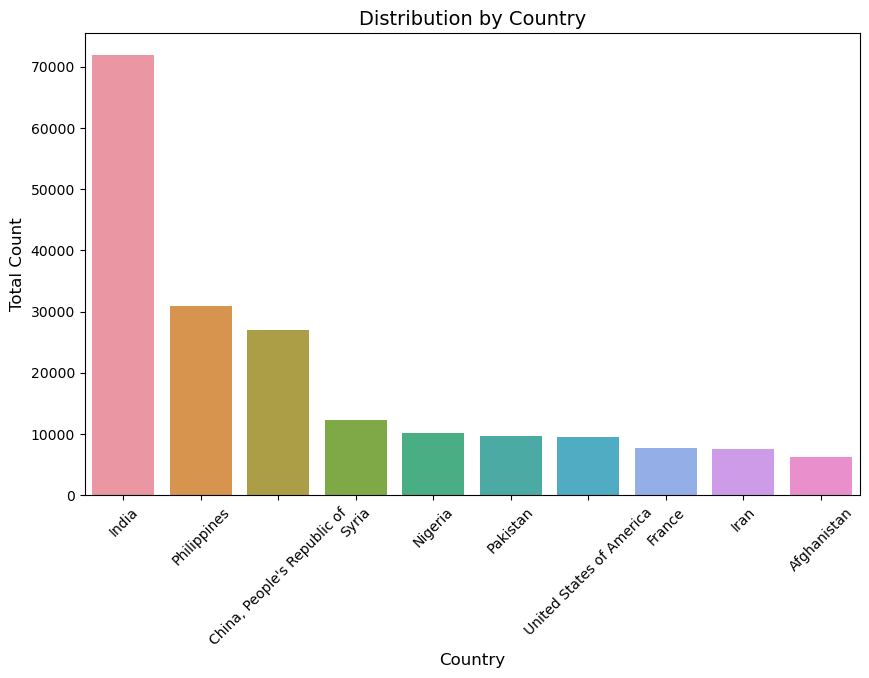

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 10 countries based on total counts
top_10_countries = df_pr.groupby('Country')['Total'].sum().sort_values(ascending=False).head(10).index

# Filter the dataframe for the top 10 countries
df_top_10_countries = df_pr[df_pr['Country'].isin(top_10_countries)]

# Explore distribution by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Total', data=df_top_10_countries, 
            order=df_top_10_countries.groupby('Country')['Total'].sum().sort_values(ascending=False).index,
            ci=None) 

plt.title('Distribution by Country', fontsize=14)  # Increase title font size
plt.xlabel('Country', fontsize=12)  # Increase x-label font size
plt.ylabel('Total Count', fontsize=12)  # Increase y-label font size
plt.xticks(rotation=45, fontsize=10)  # Rotate and decrease x-tick label font size
plt.yticks(fontsize=10)  # Decrease y-tick label font size

plt.show()


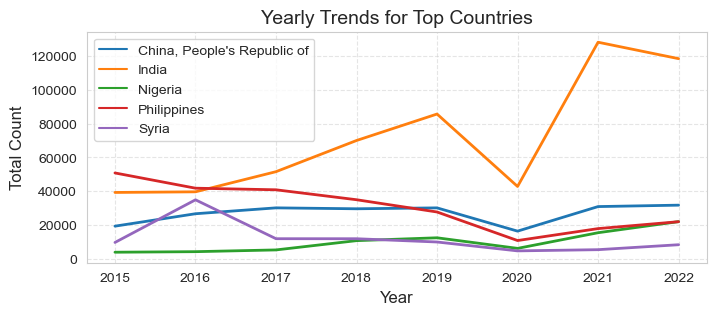

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 5 countries based on total counts
top_5_countries = df_pr.groupby('Country')['Total'].sum().nlargest(5).index

# Filter the dataframe for the top 5 countries
df_top_5_countries = df_pr[df_pr['Country'].isin(top_5_countries)]

# Explore yearly trends for top countries
plt.figure(figsize=(8, 3))
sns.lineplot(x='Year', y='Total', hue='Country', data=df_top_5_countries, palette='tab10', linewidth=2)

plt.title('Yearly Trends for Top Countries', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc='upper left')

# Adding gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Set background style
sns.set_style("whitegrid")

plt.show()
